<a href="https://colab.research.google.com/github/hungsvdut2k2/ML_Fundamental/blob/main/HousePricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install -q kaggle

**Dataset: Housing Dataset**

In [ ]:
from google.colab import files 
datasets = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
! mkdir ~/kaggle
! cp kaggle.json ~/.kaggle/

mkdir: cannot create directory ‘/root/kaggle’: File exists


In [ ]:
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d ashydv/housing-dataset

  0% 0.00/4.63k [00:00<?, ?B/s]
100% 4.63k/4.63k [00:00<00:00, 3.62MB/s]


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
df = pd.read_csv('/content/Housing.csv',index_col=False)

In [ ]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
df.describe()

**Since we start with Linear Regression With One Variable,the columns we need to focus on are area and price**

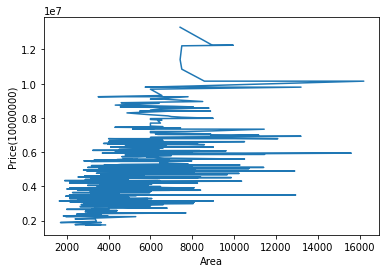

In [ ]:
x = df['area'].to_numpy().reshape(-1, 1)
y = df['price'].to_numpy().reshape(-1, 1)
plt.plot(x, y)
plt.xlabel('Area')
plt.ylabel('Price(10000000)')
plt.show()

**With Linear Regression Model, we need to fit a straight line through all data in dataset**\
So that, our $f(x) = wx + b$\
**To deal with Linear Regression, we can use Gradient Descent**\
The main function is minimizing the cost function $J(w,b) = \frac{1}{2m}\Sigma^{m}_{i=1} ((wx^i + b) - y^i)$ with $(wx+ b)$ is the predicted value of model and y is the true value

$J(w,b) = \frac{1}{2m}\Sigma^{m}_{i=1} ((wx^i + b) - y^i)$\
$\frac{d}{dw}J(w,b) = \frac{1}{m}\Sigma^{m}_{i=1} ((wx^i + b) - y^i)x^i$\
$\frac{d}{db}J(w,b) = \frac{1}{m}\Sigma^{m}_{i=1} ((wx^i + b) - y^i)$

In [ ]:
def loss_function(w, b, x, y):
  m = len(x)
  total_error = np.sum(np.power(np.dot(x, w) - y, 2)) / (2 * m)
  return total_error

In [ ]:
def d_dw(w, b, x, y):
  m = len(x)
  total_value = np.sum(np.dot((np.dot(x, w) - y),x)) / m
  return total_value

In [ ]:
def d_db(w, b, x, y):
  m = len(x)
  total_value = np.sum(np.dot(w, x) - y) / m
  return total_value

In [ ]:
def gradient_descent(w, b, x, y, learning_rate, num_iteration):
  for i in range(num_iteration):
    temp_w = w - learning_rate * d_dw(w, b, x, y)
    temp_b = b - learning_rate * d_db(w, b, x, y)
    w = temp_w
    b = temp_b
    print(d_dw(w, b, x, y), d_db(w, b, x, y))
  return w,b

In [ ]:
regr = LinearRegression()
regr.fit(x, y)

LinearRegression()

In [ ]:
x_test = np.arange(1000, 100000, 1000).reshape(-1, 1)
print(regr.predict(x_test))

[[ 2849283.37666921]
 [ 3311258.270942  ]
 [ 3773233.16521478]
 [ 4235208.05948756]
 [ 4697182.95376035]
 [ 5159157.84803313]
 [ 5621132.74230591]
 [ 6083107.6365787 ]
 [ 6545082.53085148]
 [ 7007057.42512426]
 [ 7469032.31939705]
 [ 7931007.21366983]
 [ 8392982.10794261]
 [ 8854957.0022154 ]
 [ 9316931.89648818]
 [ 9778906.79076096]
 [10240881.68503375]
 [10702856.57930653]
 [11164831.47357932]
 [11626806.3678521 ]
 [12088781.26212488]
 [12550756.15639766]
 [13012731.05067045]
 [13474705.94494323]
 [13936680.83921602]
 [14398655.7334888 ]
 [14860630.62776158]
 [15322605.52203437]
 [15784580.41630715]
 [16246555.31057993]
 [16708530.20485272]
 [17170505.0991255 ]
 [17632479.99339828]
 [18094454.88767107]
 [18556429.78194385]
 [19018404.67621664]
 [19480379.57048942]
 [19942354.4647622 ]
 [20404329.35903499]
 [20866304.25330777]
 [21328279.14758055]
 [21790254.04185333]
 [22252228.93612612]
 [22714203.8303989 ]
 [23176178.72467169]
 [23638153.61894447]
 [24100128.51321725]
 [24562103.40